# LINEAR REGRESSION ON IRIS DATASET 

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import datasets
import pandas as pd

In [75]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data)

In [76]:
print(df.columns)
df.head()

RangeIndex(start=0, stop=4, step=1)


,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [77]:
print(iris.feature_names)
print(df.shape)
iris.target[0:3]

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
(150, 4)


array([0, 0, 0])

In [78]:
df.columns = iris.feature_names
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [79]:
from sklearn import cross_validation as cv
X_train, X_test, Y_train, Y_test =cv.train_test_split(df, iris.target, test_size=0.3)

In [80]:
clf2 = LinearRegression()
clf2.fit(X_train, Y_train)
clf2.score(X_test, Y_test)

0.9314294818023794

In [81]:
predictions = clf2.predict(X_test)
print(predictions.max())

2.160035157556996


In [82]:
# iris dataset has outputs belonging to classes - [0,1,2]
# function to evaluate accuracy of predictions
def accuracy(Y_test, Y_pred):
    count=0
    j = 0
    for i in Y_test:
        if i == Y_pred[j]:
            count=count+1;
        j = j + 1
    accuracy=(count/len(Y_test))*100
    print(accuracy) 

In [83]:
Y_predicted = []
for i in predictions:
    if i<(predictions.max()/3.0):
        Y_predicted.append(0)
    elif i<(2*(predictions.max()/3.0)):
        Y_predicted.append(1)
    else:
        Y_predicted.append(2)    

In [84]:
accuracy(Y_test, Y_predicted)

97.77777777777777


In [85]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_predicted, target_names = iris.target_names))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        17
 versicolor       1.00      0.92      0.96        12
  virginica       0.94      1.00      0.97        16

avg / total       0.98      0.98      0.98        45



In [86]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# IMPLEMENTATION OF LINEAR REGRESSION FIT FUNCTION

In [87]:
# fit function made using squared error function as cost function
# we try to get the values of slope(m) and y-intercept(b) in order to get the hypothesis 
# using a single parameter of training data (SEPAL LENGTH) just to demonstrate
M = 0 
B = 0
X_test1 = np.array(X_test['sepal length (cm)'])
Y_test1 = []
def fit_self(X_t, Y_t):
    num = (X_t*Y_t).mean() - X_t.mean()*Y_t.mean()
    denom = (X_t*X_t).mean() - X_t.mean()**2
    M = num/denom
    B = Y_t.mean() - M*X_t.mean() 
    for i in X_test1:
        Y_test1.append(M*i + B)
    for i in Y_test1:
        print("{0:.3f}".format(i), end = "\t")

X_train2 = np.array(X_train['sepal length (cm)'])
Y_train2 = np.array(Y_train)
fit_self(X_train2,Y_train2)

2.084	1.009	1.582	0.436	0.937	0.436	1.152	1.439	1.869	0.292	1.224	0.292	1.510	0.149	1.295	0.794	1.797	0.507	0.436	1.439	0.722	1.654	1.224	0.292	1.654	1.152	1.797	0.436	0.507	2.370	1.224	1.439	0.579	1.295	0.937	1.439	1.367	0.579	1.654	2.012	0.866	1.725	0.507	1.080	0.794	

In [88]:
def cost(Y_true, Y_pred):
    return ((Y_true - Y_pred)**2).sum()

In [92]:
Y_actual = np.array(Y_test)
X_actual = np.array(X_test['sepal length (cm)'])
def score_self(Y_actual, Y_test1):
    num = ((Y_actual - Y_test1) **2).sum()
    denom = ((Y_actual - Y_actual.mean()) **2).sum()
    sc = 1-(num/denom)
    print("score = " + str(sc))
    
score_self(Y_actual, Y_test1)

score = 0.6826700090810882


In [93]:
#we make the same predictions using inbuilt linear regression classifier to compare the fit function's accuracy
#it can be seen that the score is equal upto 10 decimal places 
clf3 = LinearRegression()
clf3.fit(X_train2.reshape(-1,1), Y_train2)
X_test2 = X_test1.reshape(-1,1)
Y_pred = clf3.predict(X_test2)
print("score = " + str(clf3.score(X_test2, Y_test)))
for i in Y_test2:
        print("{0:.3f}".format(i), end = "\t")

score = 0.6826700090810839
2.623	0.082	0.929	0.467	1.699	1.468	2.238	0.082	1.776	1.391	1.622	0.929	0.390	2.161	1.160	1.391	1.237	1.160	1.006	1.391	1.545	1.006	0.467	0.236	0.929	-0.072	0.313	0.544	1.622	1.006	0.698	0.775	0.236	1.391	1.314	1.160	0.775	1.160	0.467	1.545	1.237	1.699	1.776	0.390	1.468	

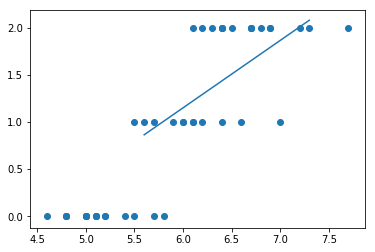

In [91]:
x1 = [X_test1[0], X_test1[40]]
y1 = [Y_test1[0], Y_test1[40]]
plt.plot(x1,y1)
plt.scatter(X_actual, Y_actual)
plt.show()
